In [29]:
import pandas as pd
import numpy as np
import io
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from yellowbrick.text import TSNEVisualizer
from sklearn.metrics import confusion_matrix

In [30]:
url='/home/abhishek/dev/Semester_2/SMAI/Assignments/Assignment_2/Datasets/Question-5/Train(1).csv'

In [31]:
def stemming(X):    
    X = X.to_numpy()
    doc = []
    for i in range(0,len(X)):
        X[i] = X[i].translate(str.maketrans('', '', string.punctuation + string.digits))
        stemmer = PorterStemmer()
        input_str = word_tokenize(X[i])
        result = ""
        for word in input_str:
            result = result+" "+stemmer.stem(word)
        doc.append(result)
    return doc

In [32]:
def preprocessing(X):
    vectorizer = TfidfVectorizer(stop_words="english")
    vectorizer_object = vectorizer.fit(X)
    X = vectorizer_object.transform(X)
    return X

In [33]:
def label_preprocessing(y):
    enc = LabelEncoder()
    enc.fit(y)
    y = enc.transform(y)
    return y

In [34]:
df = pd.read_csv(url)

X = df['text']
y = df['author']

X = np.asarray(stemming(X))
X = preprocessing(X)
y = label_preprocessing(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
# * * Visualizing Featurizing Vectors * * 
############3 Maximum Document is written by third type which is EAP##################

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


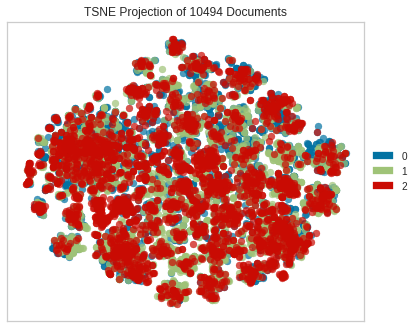

In [14]:
tsne = TSNEVisualizer()
tsne.fit(X_train, y_train)
tsne.show()

In [ ]:
###  Fitting the model ############

In [ ]:
## Tweaking Different Pramaters of SVC ##
## 

In [39]:
C_Params = [0.1,0.5,1.1,10.0,100.0]
gamma_params = ['auto','scale']
decision_shape = ['ovo','ovr']

for i in range(0,len(C_Params)):
    for j in range(0,len(gamma_params)):
        for k in range(0,len(decision_shape)):            
            clf = svm.SVC(kernel="linear",decision_function_shape=decision_shape[k],C=C_Params[j],gamma=gamma_params[j])
            clf.fit(X_train, y_train)
            y_predict = clf.predict(X_test)
            print("C==",C_Params[i])
            print("gamma_params=",gamma_params[j])
            print("decision_shape=",decision_shape[k])
            print("Accuracy Score=",accuracy_score(y_test,y_predict))
            print("Confusion Matrix")
            print(confusion_matrix(y_test,y_predict))

C== 0.1
gamma_params= auto
decision_shape= ovo
Accuracy Score= 0.6277810021280712
Confusion Matrix
[[2035   36   55]
 [ 818  522   30]
 [ 934   51  688]]
C== 0.1
gamma_params= auto
decision_shape= ovr
Accuracy Score= 0.6277810021280712
Confusion Matrix
[[2035   36   55]
 [ 818  522   30]
 [ 934   51  688]]
C== 0.1
gamma_params= scale
decision_shape= ovo
Accuracy Score= 0.7750048365254402
Confusion Matrix
[[1826  136  164]
 [ 291 1003   76]
 [ 384  112 1177]]
C== 0.1
gamma_params= scale
decision_shape= ovr
Accuracy Score= 0.7750048365254402
Confusion Matrix
[[1826  136  164]
 [ 291 1003   76]
 [ 384  112 1177]]
C== 0.5
gamma_params= auto
decision_shape= ovo
Accuracy Score= 0.6277810021280712
Confusion Matrix
[[2035   36   55]
 [ 818  522   30]
 [ 934   51  688]]
C== 0.5
gamma_params= auto
decision_shape= ovr
Accuracy Score= 0.6277810021280712
Confusion Matrix
[[2035   36   55]
 [ 818  522   30]
 [ 934   51  688]]
C== 0.5
gamma_params= scale
decision_shape= ovo
Accuracy Score= 0.77500483

In [40]:
## Picking up best Accuracy score from above and tweaking the Kernels ##

In [41]:
kernel_param = ['linear','rbf','sigmoid']
for i in range(0,len(kernel_param)):
    clf = svm.SVC(kernel=kernel_param[i],decision_function_shape='ovr',C=10.0,gamma='scale')
    clf.fit(X_train, y_train)
    print("For Kernel==",kernel_param[i])
    print("Accuracy Score=",accuracy_score(y_test,y_predict))
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_predict))

For Kernel== linear
Accuracy Score= 0.7750048365254402
Confusion Matrix
[[1826  136  164]
 [ 291 1003   76]
 [ 384  112 1177]]
For Kernel== rbf
Accuracy Score= 0.7750048365254402
Confusion Matrix
[[1826  136  164]
 [ 291 1003   76]
 [ 384  112 1177]]
For Kernel== sigmoid
Accuracy Score= 0.7750048365254402
Confusion Matrix
[[1826  136  164]
 [ 291 1003   76]
 [ 384  112 1177]]
